------------------------------
------------------------------
Acurácia:  0.6275021758050479
Recall:  0.4805081033727551
Precision:  0.6759088108441158
f1 Score:  0.5616999487967229
------------------------------
------------------------------
--- Matriz de Confusão ---
     pred_neg  pred_pos
neg      1787       526
pos      1186      1097


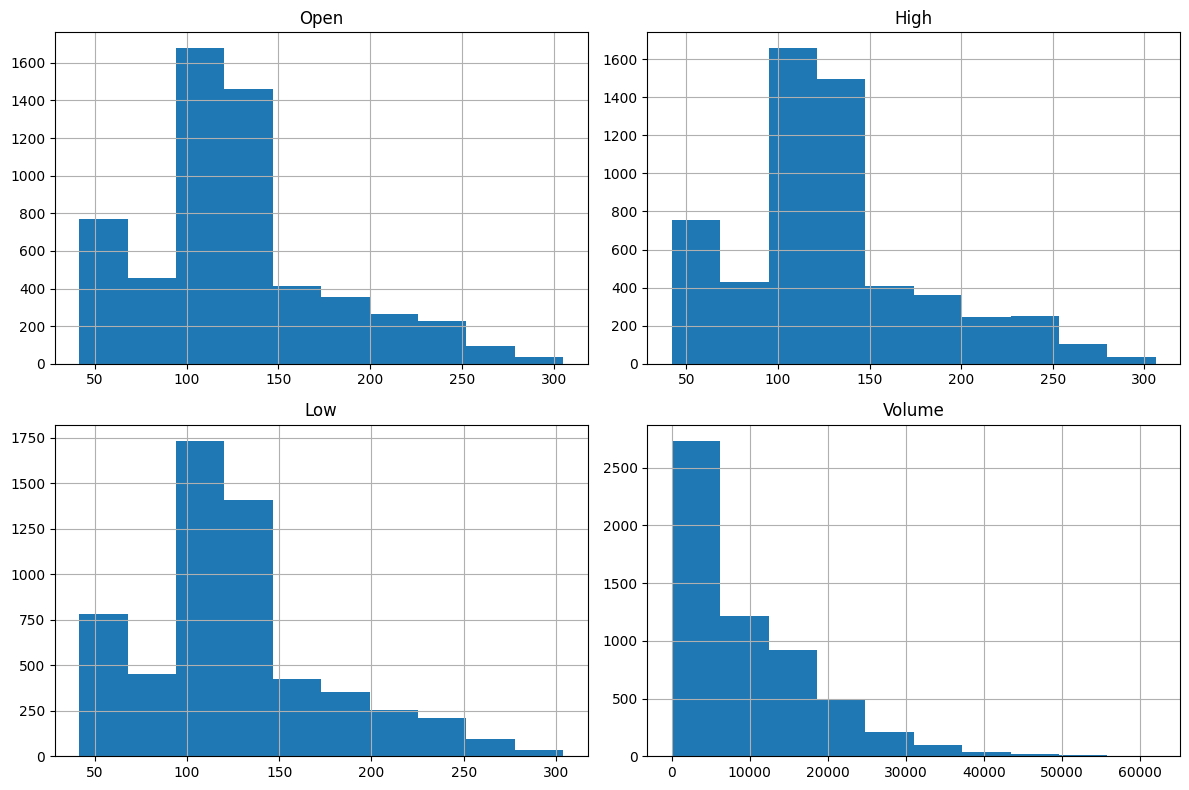

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Carregar os dados
file_path = '/content/coffee.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Apresenta, de forma completa, as cinco primeiras instâncias da base de dados.
data.head()

# Escolher o atributo para prever (por exemplo, 'Close')
target_attribute = 'Close'

# Escolher atributos para entrada
features = ['Open', 'High', 'Low', 'Volume']

# Filtrar os dados
filtered_data = data[[target_attribute] + features]

# Adicionar um rótulo para indicar se o preço aumentou no próximo dia
filtered_data['PriceIncreased'] = filtered_data[target_attribute].shift(-1) > filtered_data[target_attribute]

# Remover a última linha (não há rótulo para ela)
filtered_data = filtered_data.dropna()

# Separar os dados em conjuntos de treinamento e teste
train_size = int(len(filtered_data) * 0.8)
train_data, test_data = filtered_data[:train_size], filtered_data[train_size:]

# Separar as features e os rótulos
X_train, y_train = train_data[features], train_data['PriceIncreased']
X_test, y_test = test_data[features], test_data['PriceIncreased']

# Criar uma instância do modelo K-NN
knnModel = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

# Ajustar o modelo com os dados de treino
knnModel.fit(X_train, y_train)

# Fazer previsões para os dados de treino
predictions_train = knnModel.predict(X_train)

# Avaliar o desempenho no conjunto de treino
accuracy_train = accuracy_score(y_train, predictions_train)
recall_train = recall_score(y_train, predictions_train)
precision_train = precision_score(y_train, predictions_train)
f1_train = f1_score(y_train, predictions_train)

# Imprimir métricas
print('------------------------------')
print('------------------------------')
print('Acurácia: ', accuracy_train)
print('Recall: ', recall_train)
print('Precision: ', precision_train)
print('f1 Score: ', f1_train)
print('------------------------------')
print('------------------------------')
print('--- Matriz de Confusão ---')
print(pd.DataFrame(confusion_matrix(y_train, predictions_train), index=['neg', 'pos'], columns=['pred_neg', 'pred_pos']))


# Visualizar o histograma para as colunas selecionadas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    data[feature].hist(ax=axes[row, col])
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()